In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv('salary_data.csv')

In [3]:
df.head(3)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731


In [4]:
year =df[['YearsExperience']]

In [5]:
salary = df[['Salary']]

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

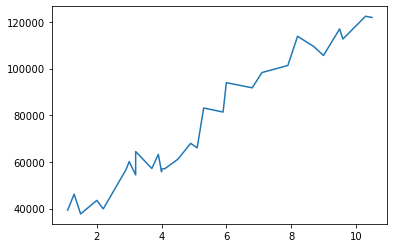

In [8]:
plt.plot(year,salary)

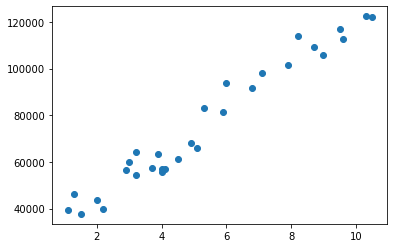

In [9]:
plt.scatter(year,salary)

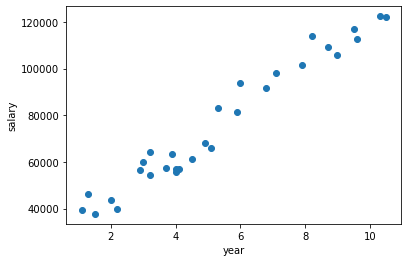

In [10]:
plt.xlabel('year')
plt.ylabel('salary')
plt.scatter(year,salary)

In [11]:
reg = linear_model.LinearRegression()

In [12]:
reg.fit(year,salary)

LinearRegression()

In [13]:
reg.predict([[5]])

array([[73042.01180594]])

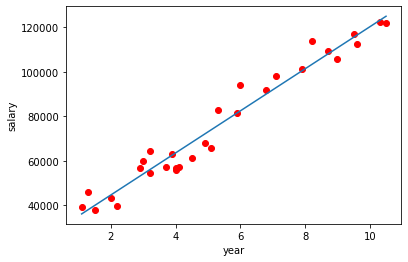

In [14]:
plt.xlabel('year')
plt.ylabel('salary')
plt.scatter(year,salary, color = 'r')
plt.plot(year, reg.predict(df[['YearsExperience']]))

In [15]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [16]:
x = df.iloc[:, :-1].values #get a copy of dataset exclude last column
y = df.iloc[:, 1].values #get array of dataset in column 1st

In [17]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [18]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [19]:
print(x.size)
print(y.size)

30
30


In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

# # test_size=1/3: we will split our dataset (30 observations) into 2 parts (training set, test set) 
# and the ratio of test set compare to dataset is 1/3 (10 observations will be put into the test set. 
# You can put it 1/2 to get 50% or 0.5, they are the same. We should not let the test set too big;
# if it’s too big, we will lack of data to train.Normally, we should pick around 5% to 30%.

# # train_size: if we use the test_size already, the rest of data will automatically be assigned to train_size.

# # random_state: this is the seed for the random number generator. We can put an instance of the RandomState class as well.
# If we leave it blank or 0, the RandomState instance used by np.random will be used instead.

In [36]:
print(X_train.size)
print(y_train.size)
print(X_test.size)
print(y_test.size)


20
20
10
10


In [21]:
X_train

array([[ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [22]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [23]:
y_train

array([ 56642,  66029,  64445,  61111, 113812,  91738,  46205, 121872,
        60150,  39891,  81363,  93940,  57189,  54445, 105582,  43525,
        39343,  98273,  67938,  56957], dtype=int64)

In [24]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794,
        83088, 101302], dtype=int64)

In [25]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

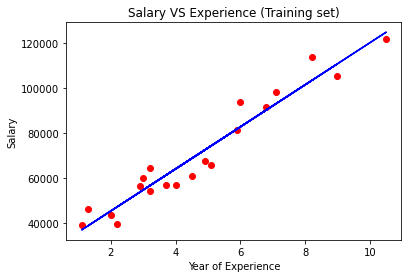

In [26]:
# Visualizing the Training set results
viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Salary VS Experience (Training set)')
viz_train.xlabel('Year of Experience')
viz_train.ylabel('Salary')
viz_train.show()

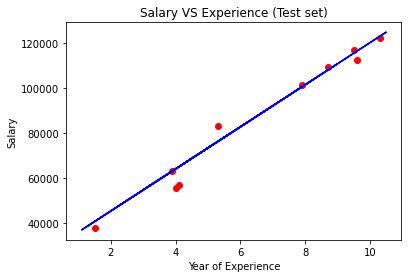

In [27]:
# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, regressor.predict(X_train), color='blue')
viz_test.title('Salary VS Experience (Test set)')
viz_test.xlabel('Year of Experience')
viz_test.ylabel('Salary')
viz_test.show()

In [28]:
regressor.predict([[5]])

array([73545.90445964])

In [29]:
regressor.predict(X_test)

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [30]:
reg.predict([[2.9]])

array([[53197.09093089]])

In [31]:
regressor.predict([[2.9]])

array([53919.42532909])

In [32]:
regressor.predict(X_train)

array([ 53919.42532909,  74480.49870396,  56723.20806202,  68872.93323808,
       103452.92027763,  90368.60085726,  38965.91742009, 124948.58789682,
        54854.0195734 ,  47377.2656189 ,  81957.25265845,  82891.84690277,
        61396.17928358,  56723.20806202, 110929.67423213,  45508.07713028,
        37096.72893147,  93172.3835902 ,  72611.31021533,  64199.96201652])

In [33]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [34]:
reg.predict(X_test)

array([[ 39967.14368085],
       [123126.81210966],
       [ 64537.04571663],
       [ 62647.05325234],
       [115566.84225249],
       [108006.87239533],
       [116511.83848464],
       [ 63592.04948449],
       [ 75877.00050238],
       [100446.90253816]])

In [37]:
from sklearn.metrics import  mean_squared_error

In [42]:
mean_squared_error(y_test,reg.predict(X_test))

19402369.954502814